# Lab 3B: Implementation of Multiple Linear Regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
dataset = pd.read_csv("C:\\Users\\hplap\\Labs\\ML_Lab\\50_Startups.csv")

## EDA Steps

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.shape

(50, 5)

In [5]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Preprocessing Steps

#### Step1: Separate dependent and independent variables

In [9]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [10]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [11]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

#### Step 3 : Encoding categorical 'State' feature
#### As state having 3 categories hence we use ONE HOT ENCODER

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])], remainder = 'passthrough')

X = ct.fit_transform(X)

In [13]:
print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

#### Step 4: Splitting the Dataset into the Training Set and Test Set

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size = 0.1,
                                                 random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)

(45, 6)
(5, 6)


## Training the Multiple Linear Regression Model on the Training Set

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [17]:
print('Coefficient for State = California(B1) = ', regressor.coef_[0])
print('Coefficient for State = Florida(B2) = ', regressor.coef_[1])
print('Coefficient for State = New York(B3) = ', regressor.coef_[2])
print('Coefficient for State = R&D Spend(B4) = ', regressor.coef_[3])
print('Coefficient for State = Administration(B5) = ', regressor.coef_[4])
print('Coefficient for State = Marketing Spend(B6) = ', regressor.coef_[5])

Coefficient for State = California(B1) =  124.85027643832848
Coefficient for State = Florida(B2) =  -1028.3563191783114
Coefficient for State = New York(B3) =  903.5060427369281
Coefficient for State = R&D Spend(B4) =  0.7783953541476762
Coefficient for State = Administration(B5) =  0.005706954372007189
Coefficient for State = Marketing Spend(B6) =  0.03213443218805878


In [18]:
print('Intercept (B0) = ', regressor.intercept_)
print('Coefficient = ')
print(regressor.coef_)

Intercept (B0) =  46250.73722000444
Coefficient = 
[ 1.24850276e+02 -1.02835632e+03  9.03506043e+02  7.78395354e-01
  5.70695437e-03  3.21344322e-02]


## Predicting the Test Set Results

In [19]:
ypred = regressor.predict(X_test)

In [20]:
print(ypred)
print(Y_test)

[101475.55240143 133287.41758274 132546.16144722  72702.71361906
 178346.51726981]
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64


### Making a Single Prediction 
#### ( for example the profit of a startup with 
#### R&D sepnd = 160000, 
#### Administration Spend = 130000, 
#### Marketing Spend = 300000 and 
#### State = 'California' )

##### [1,0,0,160000,130000,300000]

In [21]:
print(regressor.predict([[1,0,0,160000,130000,300000]]))

[181301.07788485]


In [22]:
print(regressor.coef_)
print(regressor.intercept_)

[ 1.24850276e+02 -1.02835632e+03  9.03506043e+02  7.78395354e-01
  5.70695437e-03  3.21344322e-02]
46250.73722000444


### Accuracy for Model

In [23]:
# Training Accuracy

print('Variance score: {}'.format(regressor.score(X_train, Y_train)))


Variance score: 0.94899164310162


In [24]:
# Testing Accuracy

print('Variance score: {}'.format(regressor.score(X_test, Y_test)))

Variance score: 0.9348094371037966


### Find the R^2

In [25]:
from sklearn.metrics import r2_score
print("Confidence Metric for Model = ", r2_score(Y_test,ypred))

Confidence Metric for Model =  0.9348094371037966


### Plot a Residual Error

In [26]:
# Setting the Plot Style

plt.style.use('fivethirtyeight')

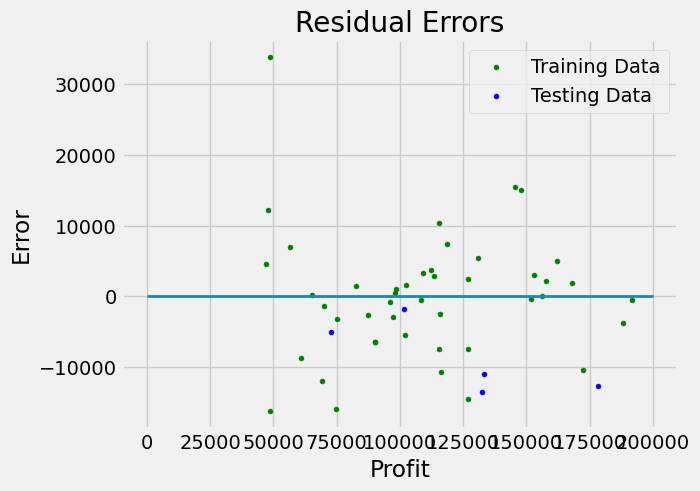

In [27]:
# Plotting Residual errors in training Data
plt.scatter(regressor.predict(X_train),regressor.predict(X_train)-Y_train, color = 'green', s = 12)

# Plotting Residual errors in testing Data
plt.scatter(regressor.predict(X_test),regressor.predict(X_test)-Y_test, color = 'blue', s = 12)

# Plotting line for zero Residual errors
plt.hlines(y=0, xmin = 0, xmax = 200000, linewidth = 2)

# Plotting Legend
plt.legend(['Training Data', 'Testing Data'], loc = 'upper right')
plt.title("Residual Errors")
plt.xlabel("Profit")
plt.ylabel("Error")

plt.show()

# Building New Model with New Random_State

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size = 0.1, 
                                                 random_state=3)

In [29]:
print(X_train.shape)
print(X_test.shape)

(45, 6)
(5, 6)


In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [31]:
print('Coefficient for State = California(B1) = ', regressor.coef_[0])
print('Coefficient for State = Florida(B2) = ', regressor.coef_[1])
print('Coefficient for State = New York(B3) = ', regressor.coef_[2])
print('Coefficient for State = R&D Spend(B4) = ', regressor.coef_[3])
print('Coefficient for State = Administration(B5) = ', regressor.coef_[4])
print('Coefficient for State = Marketing Spend(B6) = ', regressor.coef_[5])

Coefficient for State = California(B1) =  772.646533527321
Coefficient for State = Florida(B2) =  -676.6144280683291
Coefficient for State = New York(B3) =  -96.03210544366092
Coefficient for State = R&D Spend(B4) =  0.8040466725355202
Coefficient for State = Administration(B5) =  -0.031823440344773246
Coefficient for State = Marketing Spend(B6) =  0.027176253274774353


In [32]:
print('Intercept (B0) = ', regressor.intercept_)
print('Coefficient = ')
print(regressor.coef_)

Intercept (B0) =  50874.88450155946
Coefficient = 
[ 7.72646534e+02 -6.76614428e+02 -9.60321054e+01  8.04046673e-01
 -3.18234403e-02  2.71762533e-02]


In [33]:
ypred = regressor.predict(X_test)

In [34]:
print(ypred)
print(Y_test)

[128407.03331456  84765.42240742 155644.24357271  47337.78052539
  97473.29582626]
12    141585.52
39     81005.76
9     149759.96
47     42559.73
31     97483.56
Name: Profit, dtype: float64


### Making a Single Prediction 
#### ( for example the profit of a startup with 
#### R&D sepnd = 160000, 
#### Administration Spend = 130000, 
#### Marketing Spend = 300000 and 
#### State = 'California' )

##### [1,0,0,160000,130000,300000]

In [35]:
print(regressor.predict([[1,0,0,160000,130000,300000]]))

[184310.82737838]


In [36]:
print(regressor.coef_)
print(regressor.intercept_)

[ 7.72646534e+02 -6.76614428e+02 -9.60321054e+01  8.04046673e-01
 -3.18234403e-02  2.71762533e-02]
50874.88450155946


### Accuracy for Model

In [37]:
# Training Accuracy

print('Variance score: {}'.format(regressor.score(X_train, Y_train)))


Variance score: 0.9480816695782642


In [38]:
# Testing Accuracy

print('Variance score: {}'.format(regressor.score(X_test, Y_test)))

Variance score: 0.9687212688453044


### Finding the R^2 for New Model

In [39]:
from sklearn.metrics import r2_score
print("Confidence Metric for Model = ", r2_score(Y_test,ypred))

Confidence Metric for Model =  0.9687212688453044
